In [ ]:
!pip install tensorflow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset_path = '/content/drive/MyDrive/data_resampled.csv'

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv(dataset_path)
data.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,positive
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0
1,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0
2,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,0
3,14,1077,50,Pretty party dress with some issues,This is a nice choice for holiday gatherings. ...,3,1,1,General,Dresses,Dresses,0
4,16,1065,34,"You need to be at least average height, or taller",Material and color is nice. the leg opening i...,3,1,2,General,Bottoms,Pants,0


## Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing: Removing NaN values and selecting relevant columns
df = data.dropna(subset=['Review Text', 'positive'])

# Split the dataset into training and testing sets
X = df['Review Text']
y = df['positive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

# Predict the sentiment on the test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.845514950166113
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       905
           1       0.85      0.84      0.84       901

    accuracy                           0.85      1806
   macro avg       0.85      0.85      0.85      1806
weighted avg       0.85      0.85      0.85      1806



In [ ]:
y_pred[2]

1

In [ ]:
import pickle

# Save the model and tokenizer (for text processing) to files
with open('lr_model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

In [ ]:
!pip install transformers torch

In [ ]:
!pip install keras tensorflow


# Recurrent Neural Network (RNN)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing: Removing NaN values and selecting relevant columns
df = data.dropna(subset=['Review Text', 'positive'])

# Split the dataset into training and testing sets
X = df['Review Text']
y = df['positive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 10000  # You can adjust this based on your dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
max_sequence_length = 100  # You can adjust this based on your dataset
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Build an RNN model with LSTM
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, batch_size=64, epochs=5, validation_split=0.2)

# Evaluate the model
y_pred = (model.predict(X_test_padded) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also print a classification report for more detailed metrics
print(classification_report(y_test, y_pred))


Epoch 1/5
91/91 [==============================] - 49s 452ms/step - loss: 0.5919 - accuracy: 0.7174 - val_loss: 0.4339 - val_accuracy: 0.8125
Epoch 2/5
91/91 [==============================] - 31s 345ms/step - loss: 0.3568 - accuracy: 0.8500 - val_loss: 0.3586 - val_accuracy: 0.8464
Epoch 3/5
91/91 [==============================] - 25s 271ms/step - loss: 0.2396 - accuracy: 0.9112 - val_loss: 0.3405 - val_accuracy: 0.8595
Epoch 4/5
91/91 [==============================] - 27s 292ms/step - loss: 0.1748 - accuracy: 0.9443 - val_loss: 0.3745 - val_accuracy: 0.8478
Epoch 5/5
57/57 [==============================] - 5s 75ms/step
Accuracy: 0.8410852713178295
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       905
           1       0.86      0.81      0.84       901

    accuracy                           0.84      1806
   macro avg       0.84      0.84      0.84      1806
weighted avg       0.84      0.84      0.84      1806



In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd

def Eval(model, X_test_padded, y_test):
    #y_pred = model.predict(X_test_scaled)
    y_pred = (model.predict(X_test_padded) > 0.5).astype(int)
    # Assuming y_test and y_pred are your true labels and predicted labels
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    clf_report_df = pd.DataFrame(clf_report).transpose()



    print(accuracy_score(y_test, y_pred))

    # Create a heatmap using Seaborn
    sns.heatmap(clf_report_df, annot=True, cmap='YlGnBu', fmt=".2f")



57/57 [==============================] - 5s 92ms/step
0.8410852713178295


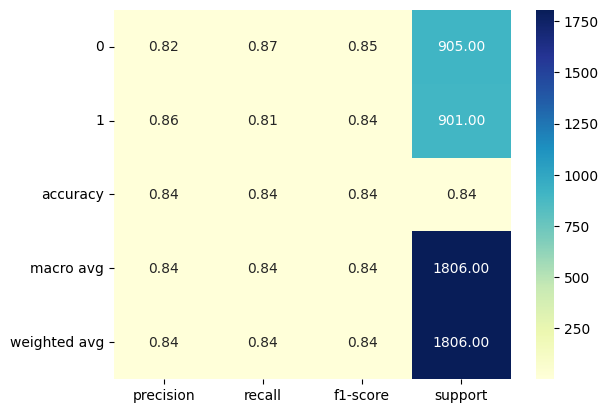

In [15]:
Eval(model,X_test_padded,y_test)

In [8]:
import pickle

# Save the model and tokenizer (for text processing) to files
with open('rnn_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)


In [ ]:
!pip install gradio

# Creating a GUI using saved RNN model

In [11]:
import gradio as gr
#from transformers import pipeline

# Define the function to classify the sentiment and apply color highlighting
# Load the trained RNN model and tokenizer
with open('rnn_model.pkl', 'rb') as model_file:
    rnn_model = pickle.load(model_file)
with open('tokenizer.pkl', 'rb') as tokenizer_file:
    loaded_tokenizer = pickle.load(tokenizer_file)

# Define a function to classify the sentiment
def classify_sentiment(review):
    # Tokenize and pad the input text
    sequences = loaded_tokenizer.texts_to_sequences([review])
    padded_sequences = pad_sequences(sequences, maxlen=100)  # Adjust maxlen as per your model

    # Make sentiment prediction
    prediction = rnn_model.predict(padded_sequences)
    sentiment = "Positive" if prediction > 0.5 else "Negative"


    # Determine the color based on sentiment
    color = "green" if sentiment == 'Positive' else "red"

    # Highlight the sentiment in color and add sentiment label
    highlighted_review = f'<span style="color: {color}">{review}</span>'

    # Add sentiment label to the output
    output = f"Sentiment: {sentiment}<br>{highlighted_review}"

    return output

# Create the Gradio interface
iface = gr.Interface(fn=classify_sentiment, inputs="text", outputs="html", title="Review Sentiment Analyzer (RNN)",description="Enter a review and get its sentiment prediction (Positive or Negative).")
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5e970c9e97c8259a38.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
